In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import geoCosiCorr3D
import geoCosiCorr3D.georoutines.geo_utils as geo_utils
import geoCosiCorr3D.georoutines.geoplt_misc as geo_plt
import geoCosiCorr3D.time_series.geoICA as geoICA
import matplotlib.gridspec as gridspec

from pathlib import Path
print(geoCosiCorr3D.__version__)
cmap = "RdYlBu"

2.5.3


In [3]:
def plt_4_bands(raster_info: geo_utils.cRasterInfo,
               o_folder=None,
               arg=None,
               off=2.5):
    fig = plt.figure(figsize=(19.20, 10.80))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)
    off = off
    axList = []
    imList = []

    for index, array_ in enumerate(raster_info.raster_array):
        ax = fig.add_subplot(spec[0, index])  # ,projection=ccrs.Mercator())
        axList.append(ax)
        array_ = np.ma.masked_where(array_ < -100, array_)
        array_ = np.ma.masked_where(array_ > 100, array_)

        im = ax.imshow(array_, cmap=cmap, vmin=-off, vmax=off)
        imList.append(im)

        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    geo_plt.ColorBar_(ax=axList[-1], mapobj=imList[-1], size=12, vmin=-off, vmax=off,
                      cmap='RdBlu')  # ticks=[-off, 0,  off], width="3%")
    if o_folder != None:
        svgPath = os.path.join(o_folder, arg + ".svg")
        fig.savefig(svgPath, transparent=False, format="svg", dpi=600)
    else:
        plt.show()

## Aliasing artifacts, combining Spot-6 and WV images
#### Study area: Ridgecrest, California

### 1| Import data

In [4]:
path = "dataset"
ew_fn = os.path.join(path, "EW_WV_Spot_MB_3DDA.tif")
ns_fn = os.path.join(path, "NS_WV_Spot_MB_3DDA.tif")
window = [438404.668, 3956432.6313, 449235.1422, 3965948.5889]
# dzPath = os.path.join(path, "Dz_WV_Spot_MB_3DDA_det")

### 2| EW component

In [5]:
ew_ica = geoICA.geoICA(ew_fn, 4)
ew_ica()

<< EW_WV_Spot_MB_3DDA_geoICA >> folder already exist type y to delete and recreate new one or type n :  
Successfully created the directory <<dataset/EW_WV_Spot_MB_3DDA_geoICA>> 
Valid values: 1499317:1899710 ===> invalid:400393
input_array dim:(1899710, 4)
masked array dim:(1499317, 4)
U: (1499317, 4) S: (4,) Vt: (4, 4)
{'algorithm': 'parallel', 'fun': 'exp', 'fun_args': None, 'max_iter': 1000, 'n_components': 4, 'random_state': None, 'tol': 0.0001, 'w_init': None, 'whiten': 'unit-variance', 'whiten_solver': 'svd'}


Extracting components:   0%|          | 0/4 [00:00<?, ?it/s]

===> IC:1
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma -2.834045117783062e-06 1.00000000254402
RMSE= 1.000
max= 46.911 min= -51.908 std= 1.000 mean= -0.000 median 0.009 mad= 0.075 nmad= 0.111
CE68= (-0.9944607197847917, 0.9944550516945565) CE90= (-1.6448564651811313, 1.6448507970908952) CE95= (-1.9599668235713594, 1.959961155481124) CE99= (-2.57583214414698, 2.5758264760567444)


Extracting components:  25%|██▌       | 1/4 [00:00<00:01,  2.62it/s]

===> IC:2
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma -1.5358181190359027e-06 0.9999999870250673
RMSE= 1.000
max= 34.840 min= -32.928 std= 1.000 mean= -0.000 median 0.005 mad= 0.094 nmad= 0.140
CE68= (-0.994459406124848, 0.9944563344886104) CE90= (-1.6448551414277268, 1.644852069791488) CE95= (-1.9599654949277725, 1.9599624232915343) CE99= (-2.5758308059458073, 2.5758277343095695)


Extracting components:  50%|█████     | 2/4 [00:00<00:00,  2.55it/s]

===> IC:3
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma 1.0762334216165961e-06 1.0000000982302568
RMSE= 1.000
max= 40.650 min= -38.234 std= 1.000 mean= 0.000 median -0.009 mad= 0.071 nmad= 0.106
CE68= (-0.9944569046621847, 0.9944590571290284) CE90= (-1.6448527122924455, 1.6448548647592882) CE95= (-1.9599631008343978, 1.9599652533012413) CE99= (-2.575828480339853, 2.5758306328066958)


Extracting components:  75%|███████▌  | 3/4 [00:01<00:00,  2.42it/s]

===> IC:4
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma -4.800926008223907e-07 0.9999998553919456
RMSE= 1.000
max= 17.929 min= -18.218 std= 1.000 mean= -0.000 median 0.148 mad= 0.722 nmad= 1.070
CE68= (-0.9944582194957341, 0.994457259310533) CE90= (-1.6448538691849908, 1.6448529089997885) CE95= (-1.9599641812060764, 1.9599632210208748) CE99= (-2.575829411155837, 2.5758284509706355)


Extracting components: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:   0%|          | 0/4 [00:00<?, ?it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  25%|██▌       | 1/4 [00:00<00:01,  1.74it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Reconstructed component 0 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_0.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  50%|█████     | 2/4 [00:01<00:01,  1.80it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Reconstructed component 1 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_1.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  75%|███████▌  | 3/4 [00:01<00:00,  1.81it/s]

Reconstructed component 2 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_2.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

Reconstructed component 3 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_3.tif


#### 2.1| EW: plot observations

Plotting input EW: 


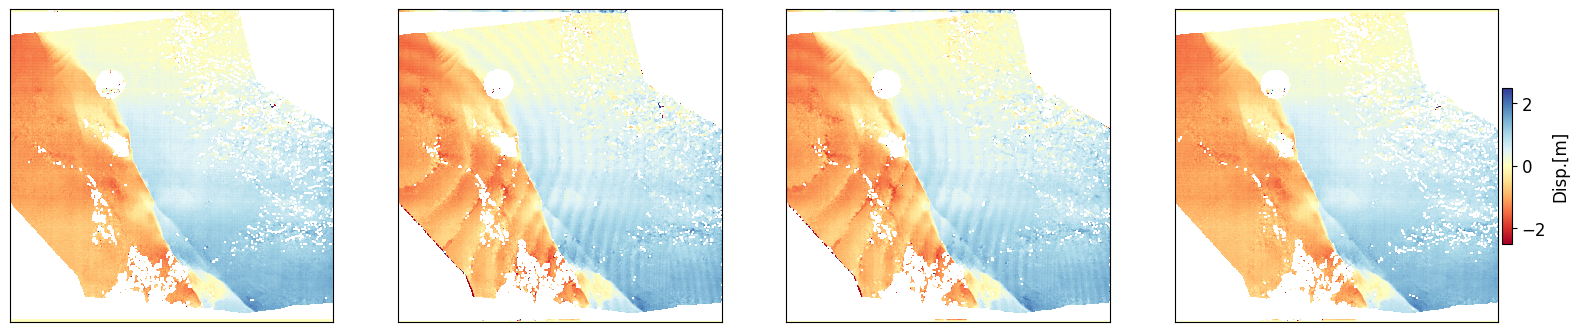

In [6]:
print("Plotting input EW: ")
plt_4_bands(raster_info=ew_ica.raster_info, arg="EW_orig_Disp")

#### 2.3| EW: ICA decomposition and reconstruction

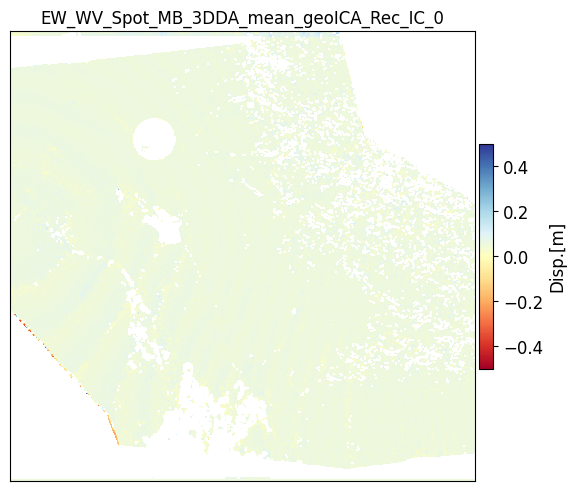

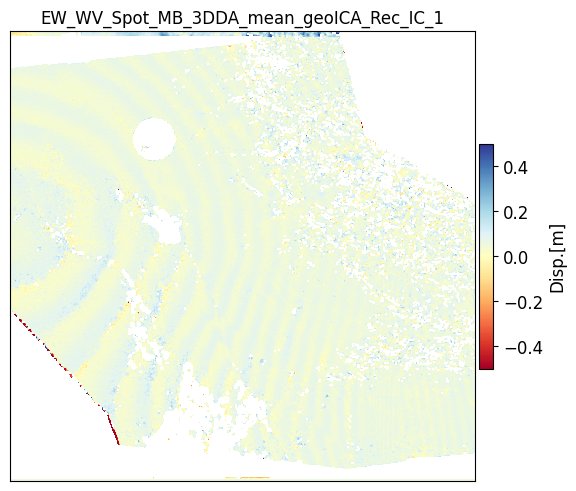

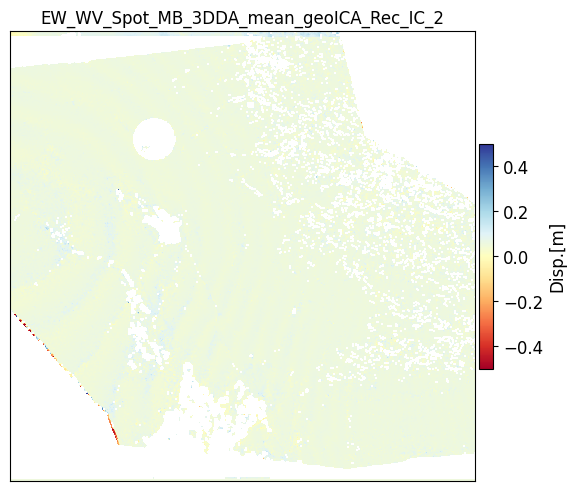

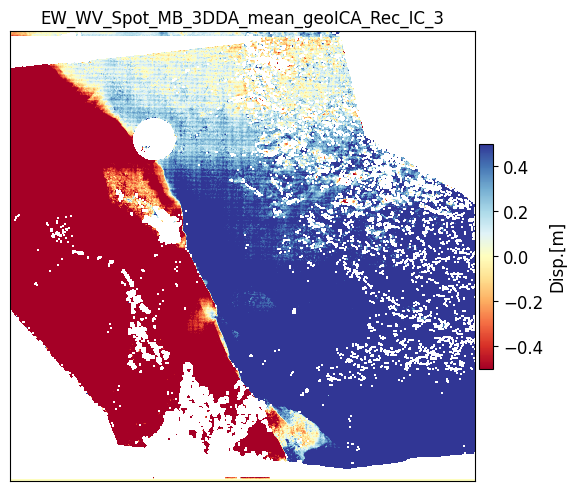

In [7]:
off = 0.5
for mean_rec_fn in ew_ica.mean_reconstructed_fns:
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
    mapobj = ax1.imshow(np.ma.masked_invalid(geo_utils.cRasterInfo(mean_rec_fn).raster_array[0]),
                        vmin=-off, vmax=off, cmap="RdYlBu")
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    geo_plt.ColorBar_(ax=ax1, mapobj=mapobj, size=12, vmin=-off, vmax=off, cmap='RdBlu')
    ax1.set_title(Path(mean_rec_fn).stem)
plt.show()

##### 2.3.3| EW: Residuals

### 3| NS component

<< NS_WV_Spot_MB_3DDA_geoICA >> folder already exist type y to delete and recreate new one or type n :  
Successfully created the directory <<dataset/NS_WV_Spot_MB_3DDA_geoICA>> 
Valid values: 1494710:1899710 ===> invalid:405000
input_array dim:(1899710, 4)
masked array dim:(1494710, 4)
U: (1494710, 4) S: (4,) Vt: (4, 4)
{'algorithm': 'parallel', 'fun': 'exp', 'fun_args': None, 'max_iter': 1000, 'n_components': 4, 'random_state': None, 'tol': 0.0001, 'w_init': None, 'whiten': 'unit-variance', 'whiten_solver': 'svd'}


/home/saif/miniconda3/envs/geoCosiCorr3D/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
Extracting components:   0%|          | 0/4 [00:00<?, ?it/s]

===> IC:1
Valid values:1494710 :1899710 ===> invalid:405000
mu, sigma 4.93295482823815e-06 1.0000001449490572
RMSE= 1.000
max= 35.700 min= -33.342 std= 1.000 mean= 0.000 median -0.006 mad= 0.105 nmad= 0.155
CE68= (-0.9944530944006573, 0.9944629603103143) CE90= (-1.644848932416627, 1.6448587983262828) CE95= (-1.9599593356801577, 1.959969201589814) CE99= (-2.5758247439581012, 2.5758346098677576)


Extracting components:  25%|██▌       | 1/4 [00:00<00:01,  1.75it/s]

===> IC:2
Valid values:1494710 :1899710 ===> invalid:405000
mu, sigma 1.8414570932551138e-06 0.9999999681247911
RMSE= 1.000
max= 46.375 min= -44.771 std= 1.000 mean= 0.000 median 0.005 mad= 0.091 nmad= 0.135
CE68= (-0.994456010054107, 0.994459692968294) CE90= (-1.6448517330643266, 1.6448554159785125) CE95= (-1.9599620806086993, 1.9599657635228858) CE99= (-2.5758273799867095, 2.5758310629008965)


Extracting components:  50%|█████     | 2/4 [00:01<00:01,  1.62it/s]

===> IC:3
Valid values:1494710 :1899710 ===> invalid:405000
mu, sigma 1.4979578496917578e-06 1.0000000251465875
RMSE= 1.000
max= 17.885 min= -16.086 std= 1.000 mean= 0.000 median 0.006 mad= 0.639 nmad= 0.948
CE68= (-0.9944564102591256, 0.9944594061748253) CE90= (-1.6448521703560788, 1.6448551662717776) CE95= (-1.9599625358686101, 1.9599655317843097) CE99= (-2.5758278703643676, 2.575830866280067)


Extracting components:  75%|███████▌  | 3/4 [00:01<00:00,  1.83it/s]

===> IC:4
Valid values:1494710 :1899710 ===> invalid:405000
mu, sigma -2.9469222477146405e-06 0.9999999126640297
RMSE= 1.000
max= 39.317 min= -40.023 std= 1.000 mean= -0.000 median 0.005 mad= 0.133 nmad= 0.198
CE68= (-0.9944607432800565, 0.9944548494355616) CE90= (-1.644856430218833, 1.6448505363743369) CE95= (-1.9599667602869455, 1.95996086644245) CE99= (-2.5758320255085962, 2.575826131664101)


Extracting components: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:   0%|          | 0/4 [00:00<?, ?it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  25%|██▌       | 1/4 [00:00<00:01,  1.55it/s]

Reconstructed component 0 saved to dataset/NS_WV_Spot_MB_3DDA_geoICA/NS_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_0.tif
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  50%|█████     | 2/4 [00:01<00:01,  1.39it/s]

Reconstructed component 1 saved to dataset/NS_WV_Spot_MB_3DDA_geoICA/NS_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_1.tif
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  75%|███████▌  | 3/4 [00:02<00:00,  1.37it/s]

Reconstructed component 2 saved to dataset/NS_WV_Spot_MB_3DDA_geoICA/NS_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_2.tif
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000
Valid values:1494710 :1899710 ===> invalid:405000


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Reconstructed component 3 saved to dataset/NS_WV_Spot_MB_3DDA_geoICA/NS_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_3.tif
Plotting input NS: 


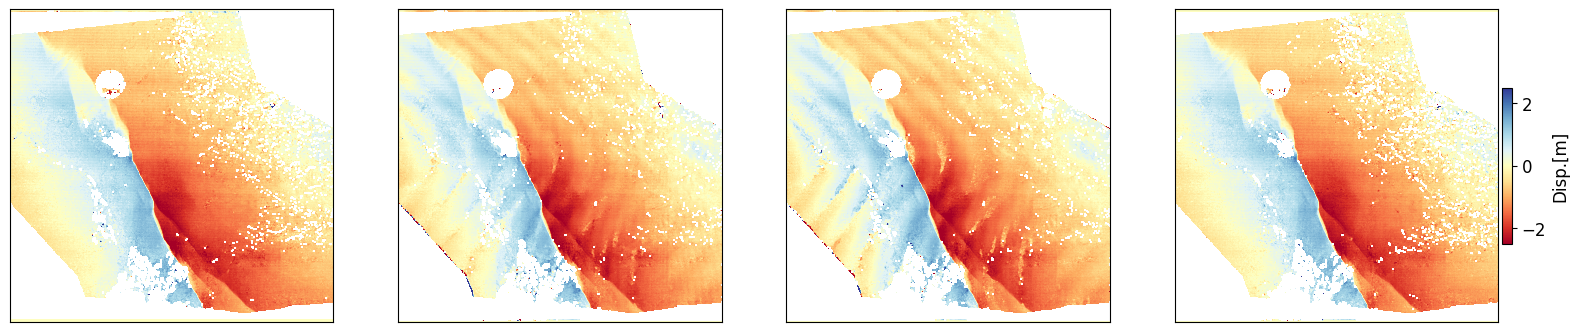

In [8]:
ns_ica = geoICA.geoICA(ns_fn, 4)
ns_ica()
print("Plotting input NS: ")
plt_4_bands(raster_info=ns_ica.raster_info, arg="NS_orig_Disp")

#### 3.1| NS: ICA decomposition and reconstruction

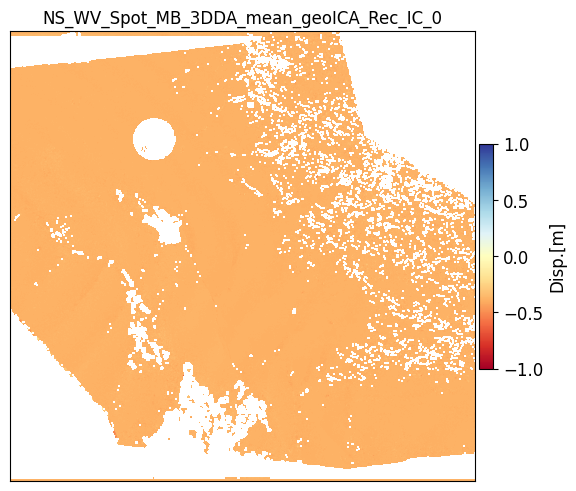

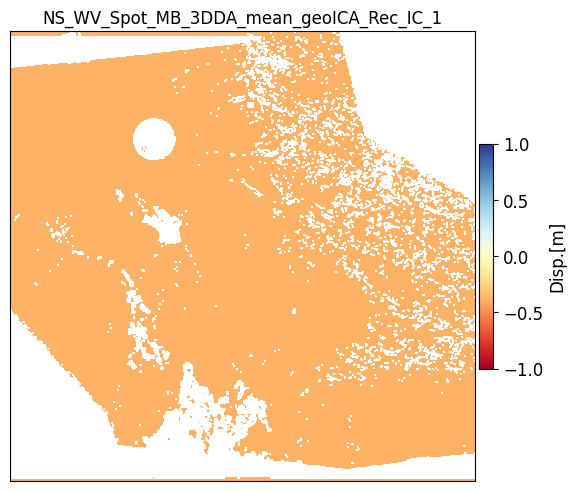

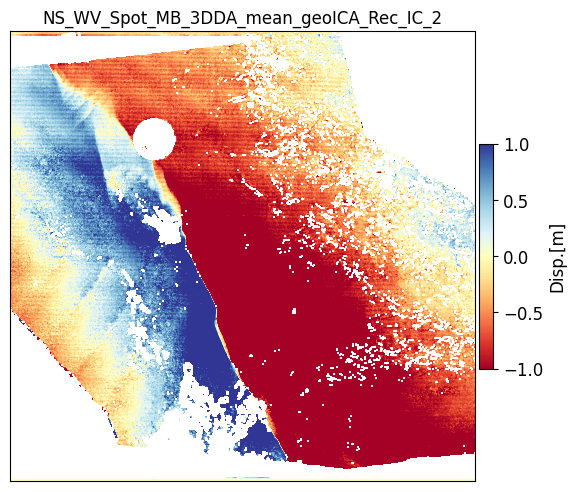

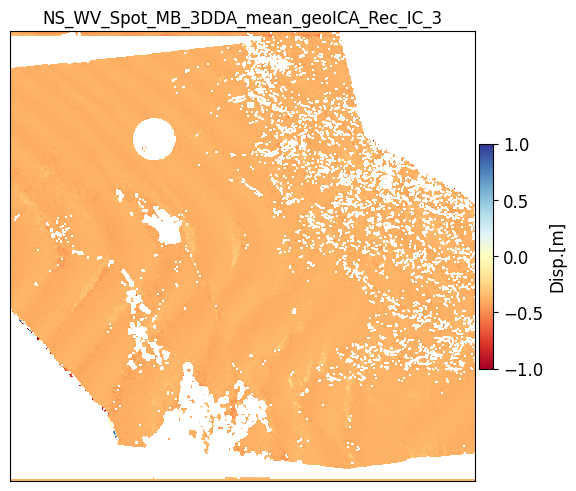

In [12]:
off = 1
for mean_rec_fn in ns_ica.mean_reconstructed_fns:
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
    mapobj = ax1.imshow(np.ma.masked_invalid(geo_utils.cRasterInfo(mean_rec_fn).raster_array[0]),
                        vmin=-off, vmax=off, cmap="RdYlBu")
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    geo_plt.ColorBar_(ax=ax1, mapobj=mapobj, size=12, vmin=-off, vmax=off, cmap='RdBlu')
    ax1.set_title(Path(mean_rec_fn).stem)
plt.show()